# Assignment #3 - Neural Networks

### <font color="red"> DUE: Mar 13 (Tuesday) 11:00 pm </font>  

<font color="blue"> Jimmy Nguyen </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

The objective of this assignment is to use neural networks to build synaptic connections by connecting the perceptrons, also known as multi-layer perceptron (MLP). 

# II. Data

This collection of data represents a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The data was preprocessed.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy as copy

# This is a python magic command.
# This command allows the output of matplotlib to be displayed inline, i.e. under the cell.
%matplotlib inline

In [87]:
df = pd.read_csv("airfoil_self_noise.dat", names = ["Frequency", "Angle of Atk", "Chord Length", "Velocity", 
                                                    "Suction side displacement thickness", "Scaled sound pressure level"], delim_whitespace = True)
df

Frequency  Angle of Atk  Chord Length  Velocity  \
0           800           0.0        0.3048      71.3   
1          1000           0.0        0.3048      71.3   
2          1250           0.0        0.3048      71.3   
3          1600           0.0        0.3048      71.3   
4          2000           0.0        0.3048      71.3   
5          2500           0.0        0.3048      71.3   
6          3150           0.0        0.3048      71.3   
7          4000           0.0        0.3048      71.3   
8          5000           0.0        0.3048      71.3   
9          6300           0.0        0.3048      71.3   
10         8000           0.0        0.3048      71.3   
11        10000           0.0        0.3048      71.3   
12        12500           0.0        0.3048      71.3   
13        16000           0.0        0.3048      71.3   
14          500           0.0        0.3048      55.5   
15          630           0.0        0.3048      55.5   
16          800           0.0        0.3048      55.5   
17         1000           0.0        0.3048      55.5   
18         1250           0.0        0.3048      55.5   
19         1600           0.0        0.3048      55.5   
20         2000           0.0        0.3048      55.5   
21         2500           0.0        0.3048      55.5   
22         3150           0.0        0.3048      55.5   
23         4000           0.0        0.3048      55.5   
24         5000           0.0        0.3048      55.5   
25         6300           0.0        0.3048      55.5   
26         8000           0.0        0.3048      55.5   
27        10000           0.0        0.3048      55.5   
28        12500           0.0        0.3048      55.5   
29          200           0.0        0.3048      39.6   
...         ...           ...           ...       ...   
1473        200          15.6        0.1016      71.3   
1474        250          15.6        0.1016      71.3   
1475        315          15.6        0.1016      71.3   
1476        400          15.6        0.1016      71.3   
1477        500          15.6        0.1016      71.3   
1478        630          15.6        0.1016      71.3   
1479        800          15.6        0.1016      71.3   
1480       1000          15.6        0.1016      71.3   
1481       1250          15.6        0.1016      71.3   
1482       1600          15.6        0.1016      71.3   
1483       2000          15.6        0.1016      71.3   
1484       2500          15.6        0.1016      71.3   
1485       3150          15.6        0.1016      71.3   
1486       4000          15.6        0.1016      71.3   
1487        200          15.6        0.1016      39.6   
1488        250          15.6        0.1016      39.6   
1489        315          15.6        0.1016      39.6   
1490        400          15.6        0.1016      39.6   
1491        500          15.6        0.1016      39.6   
1492        630          15.6        0.1016      39.6   
1493        800          15.6        0.1016      39.6   
1494       1000          15.6        0.1016      39.6   
1495       1250          15.6        0.1016      39.6   
1496       1600          15.6        0.1016      39.6   
1497       2000          15.6        0.1016      39.6   
1498       2500          15.6        0.1016      39.6   
1499       3150          15.6        0.1016      39.6   
1500       4000          15.6        0.1016      39.6   
1501       5000          15.6        0.1016      39.6   
1502       6300          15.6        0.1016      39.6   

      Suction side displacement thickness  Scaled sound pressure level  
0                                0.002663                      126.201  
1                                0.002663                      125.201  
2                                0.002663                      125.951  
3                                0.002663                      127.591  
4                                0.002663                      127.461  
5                                

The data shown is based on six attributes: Frequency (in hertzs), angle of attack (in degrees), chord length (in meters), free-stream velocity (meters per second), and suction side displacement thickness (in meters). The data displays the scaled sound pressure level based on the varying inputs. 

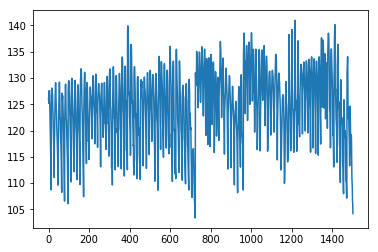

In [88]:
plt.plot('Scaled sound pressure level', data = df)

This plot shows each sample and its resulting pressure level based on the controlled inputs. The data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. 

# Preliminary Observation

This graph represents the tests done in the airfoil experiments, and based on the data, the later samples, the overall pressure level is higher, but they tend to be lower as the frequency increased, implying that it is a much bigger factor compared to the other attributes.

# III. Methods


## III.A Nonlinear Regression 

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes (not in comment). 
  - As we provided the complete NN class that you can play with, you need to reverse-engineer to show your understanding of the codes here.
  - You are allowed to modify the class freely if need, but you should explain the changes. 
  
  Nonlinear regression is a method used to help describe and visualize nonlinear relationships in data. We can update the weights by derivation of each output layer. The model depends on independent variables and uses the data to be fitted by approximations.

In [89]:
import grad
import nn as NeuralNet
import util

In [90]:
T = df[['Scaled sound pressure level']].copy()
X = df.iloc[:, :-1].copy()
N = 1503

In [91]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    # Checks to make sure ratio sums to 1
    assert(np.sum(ratio) == 1)
    
    # Store the number of data samples 
    N = X.shape[0]

    # change the 1d array to 2d if need
    if len(T.shape) == 1:
        T = T.reshape((N,1))
    
    # Shuffle the data indices 
    idxs = np.random.permutation(N)
        
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
         # Number of rows that corresponds to kth element in ratios
        nrows = int(round(N * r)) 
        
        # print (i, nrows)
        # If we are on the last ratio simply use the remaining data samples
        if k == len(ratio)-1:
            Xs.append(X[idxs[i:], :])
            Ts.append(T[idxs[i:], :])
        else:
            Xs.append(X[idxs[i:i+nrows], :])
            Ts.append(T[idxs[i:i+nrows], :])
        
        i += nrows
    
    return Xs, Ts

In [92]:
def partition_data(X, T):
    data, targets = partition(copy(X.values), copy(T.values))
    Xtrain, Xtest = data[0].copy(), data[1].copy()
    Ttrain, Ttest = targets[0].copy(), targets[1].copy()
    return Xtrain, Xtest, Ttrain, Ttest

In [93]:
Xtrain, Xtest, Ttrain, Ttest = partition_data(X, T)

In [94]:
N = X.shape[0] # Number of data samples
D = X.shape[1] # Number of data features
K = T.shape[1] # Number of output values
Ntrain = Xtrain.shape[0] # Number of train data samples
Ntest = Xtest.shape[0] # Number of test data samples
print("N = {} data samples".format(N))
print("D = {} data features".format(D))
print("K = {} data features".format(K))
print("Ntrain = {} training data samples".format(Ntrain))
print("Ntest = {} testing data samples".format(Ntest))

N = 1503 data samples
D = 5 data features
K = 1 data features
Ntrain = 1202 training data samples
Ntest = 301 testing data samples


In [95]:
nHidden = 5

something = nn.NeuralNet([D, nHidden, K])

something.train(Xtrain, Ttrain, ftracep=True)

Ytrain = something.use(Xtrain)

C:\Users\jimmy\Machine learning class\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Text(0, 0.5, 'error')

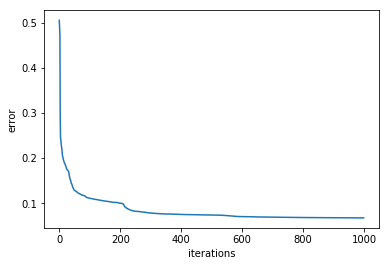

In [96]:
plt.plot(something.ftrace)
plt.xlabel("iterations")
plt.ylabel("error")

In [97]:
def plot_fit(Y, T, title=None):
    """ Plot the passed predictions and targets while also computing
        and printing the RMSE.
    """
    plt.plot(T, label="target")
    plt.plot(Y, linewidth=3, label="prediction")
    plt.legend()
    plt.ylabel("Allometry")
    plt.xlabel("Samples")
    plt.title(title)
    # RMSE
    rmse = np.sqrt(np.mean((Y - T)**2))
    print("RMSE: {}".format(rmse))

RMSE: 2.538054682350702


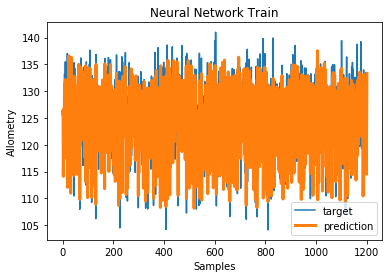

In [98]:
plot_fit(Ytrain, Ttrain, title="Neural Network Train")

RMSE: 2.873659063874301


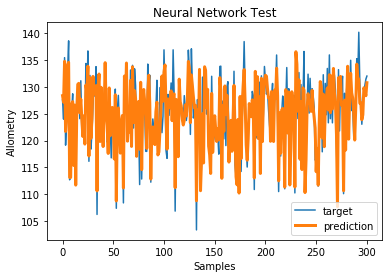

In [100]:
Ytest = something.use(Xtest)

plot_fit(Ytest, Ttest, title="Neural Network Test")

Neural network class is used for regression to be used to apply on my dataset. In the class, the methods train, use, and the constructor method are used. The constructers takes the inputs, the number of hidden units, and the outputs as parameters. The significance of the class is to forward pass, backward pass, and use gradient descent. For the neural network tests, I used the dataset above to determine the predictions. The graph are similar, implying that the results are similar and the approximations are also alike.

## III.B 5-fold Cross Validation (CV)

- Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies. 
- Here is the pseudo code for k-fold CV

    Cross validation is a method used to approximate the skill of machine learning models. They are generally used to select the value of K within the selected data. K-fold cross validation is a resampling procedure used to evaluate models using a limited data sample. For each groups K, it will be trained and evaluated to get a validation score, which at the end will be sed to compare to other groups. Using the scores, a proper summary can be concluded that explains the data.

### K-fold CV Procedure


![image.png](attachment:image.png)

def split5(data):
    data_split = []
    data_copy = list(data)
    fold_size = int(len(data) / 5)
    
    for i in range(5):
        fold = []
        while len(fold) < 5:
            index = randrang(len(data_copy))
            fold.append(data_copy.pop(index))
        
        data_split.append(fold)
        
    return data_split
        


def foldCV(X, T):
    nfold = 0
    res = [], testErrs = []
    XSplit = split5(X)
    TSplit = split5(T)
    
    for Ts in TSplit:
        for Xs in XSplit:
            Xtrain = XSplit.remove(Xs)
            
            for p in Xtrain:
                

In [101]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [102]:
T = T.values
X = X.values

In [111]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)

lr = LogisticRegression()
scores = []

for train_index, test_index in kf.split(X):
        Xtrain, Xtest = X[train_index], X[test_index]
        ttrain, Ttest = T[train_index], T[test_index]
        
        lr.fit(Xtrain, Ttrain.astype('int'))
        scores.append(lr.score(Xtest, Ttest.astype('int')))

KFold(n_splits=5, random_state=None, shuffle=False)


C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataCo

ValueError: Found input variables with inconsistent numbers of samples: [1203, 1202]

# IV - Results

- Presents the results of comparison of the tested models with CV errors.
- Visualize the results 
- What do you think about the results? 

I could not get proper results because I could not properly impliment the K-fold CV. I would get errors because I couldn't properly fit the data, as it would return unexpected results.

For the results of the neural network, the graphs are similar, implying that results are reliable. It looked a lot more accurate as to the results form assignment 1. I can say that the pressure level is more consistent as their inputs were the same or similar.

As for the K-Fold CV, I couldn't get any results as there is no results to reference. 

# Conclusions

I'm struggling a lot with this assignment. While using the labs and help from peers, I could not figure out how exactly nonlinear regression or 5-Fold cross validation is implimented. I could not finish the assignment as I did not have the proper knowledge to fully understand what I was doing. While I imported the nonlinear regression class, I had a slight idea of what was expected because of using the labs as guidence. Overall, I will not do well on this assignment and will need to spend more time learning about this section and concepts.

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs4156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 20| Summary of CV & correctness of implementation
 | 10| Summary of nonlinear regression 
 | 10| Explanation of codes
40 | Results | Your Data
| 10| Presentaion of CV results (20 CV erros and parameters)
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
